In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from qiskit_optimization.applications import Tsp
import openpyxl
import ast

In [3]:
path = 'C:\\Users\\LENOVO\\OneDrive - National University of Sciences & Technology\\Academia\\FYP\\TSP-4.xlsx'

In [10]:
wb = openpyxl.load_workbook(path)
ws = wb.active
adj_matrix =np.array(ast.literal_eval(ws['A4'].value))
permutation_matrix = np.array(ast.literal_eval(ws['A3'].value))


In [2]:
def plot_tsp(adj_matrix, node_colors=None, figsize=(6, 4)):
    plt.figure(figsize=figsize)  # Set figure size before plotting
    G = nx.from_numpy_matrix(adj_matrix)
    pos = nx.spring_layout(G)
    
    if node_colors:
        nx.draw(G, pos, with_labels=True, node_color=node_colors)
    else:
        nx.draw(G, pos, with_labels=True)
        
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    
    plt.show()


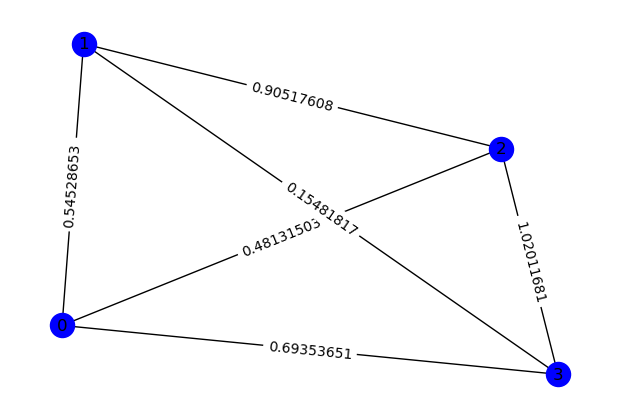

In [12]:
# adj_matrix = np.array([[0.        ,0.8, 0.5],
#                      [0.8, 0.        ,0.6 ],
#                      [0.5, 0.6 ,0.        ]])
node_colors = ['b']

plot_tsp(adj_matrix, node_colors=node_colors, figsize=(6, 4))

## Generating tsp Instances

In [7]:
import numpy as np

def generate_tsp_instance(num_nodes):
    # Generate random coordinates for each node
    coordinates = np.random.rand(num_nodes, 2)  # 2D coordinates
    
    # Calculate distances between nodes
    distances = np.zeros((num_nodes, num_nodes))
    for i in range(num_nodes):
        for j in range(num_nodes):
            if i != j:
                distances[i, j] = np.linalg.norm(coordinates[i] - coordinates[j])  # Euclidean distance
    
    return coordinates, distances


### Brute force method

In [8]:
# Simulating with a brute force method
from itertools import permutations


def brute_force_tsp(w, N):
    a = list(permutations(range(1, N)))
    last_best_distance = 1e10
    for i in a:
        distance = 0
        pre_j = 0
        for j in i:
            distance = distance + w[j, pre_j]
            pre_j = j
        distance = distance + w[pre_j, 0]
        order = (0,) + i
        if distance < last_best_distance:
            best_order = order
            last_best_distance = distance
#             print("order = " + str(order) + " Distance = " + str(distance))
    return last_best_distance, best_order



##### Partial Permutation matrix of the solution

In [26]:
import numpy as np

def partial_permutation_matrix(num_nodes, indices):
    
    P = np.eye(num_nodes)
    P = P[:, indices]
    return P


n = 3  # Size of the permutation matrix
indices = [0, 1, 2]  # Indices specifying the permutation
P_partial = partial_permutation_matrix(n, indices)
print("Partial Permutation Matrix:")
print(P_partial)

Partial Permutation Matrix:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [13]:
coordinates, adj_matrix = generate_tsp_instance(num_nodes)
best_distance, best_order= brute_force_tsp(adj_matrix, num_nodes)

(0, 4, 3, 2, 1)

###### Looping for more solutions

In [15]:
for i in range(5):
    coordinates, adj_matrix = generate_tsp_instance(num_nodes)
    best_distance, best_order= brute_force_tsp(adj_matrix, num_nodes)
    print(
    "Best order from brute force = "
    + str(best_order)
    + " with total distance = "
    + str(best_distance)
    )
    P_partial = partial_permutation_matrix(num_nodes, list(best_order))
    print('partial permutation matrix \n', P_partial)

Best order from brute force = (0, 1, 3, 2, 4) with total distance = 1.9196363227027369
partial permutation matrix 
 [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]]
Best order from brute force = (0, 1, 3, 4, 2) with total distance = 2.5937256867361613
partial permutation matrix 
 [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]]
Best order from brute force = (0, 2, 1, 3, 4) with total distance = 2.0728253065198325
partial permutation matrix 
 [[1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
Best order from brute force = (0, 3, 1, 2, 4) with total distance = 2.136456930652828
partial permutation matrix 
 [[1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]
Best order from brute force = (0, 3, 4, 1, 2) with total distance = 1.7829402803943497
partial permutation matrix 
 [[1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0

#### Draw Tsp solution

In [11]:
def draw_tsp_solution(G, order, colors, pos):
    G2 = nx.DiGraph()
    G2.add_nodes_from(G)
    n = len(order)
    for i in range(n):
        j = (i + 1) % n
        G2.add_edge(order[i], order[j], weight=G[order[i]][order[j]]["weight"])
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(
        G2, node_color=colors, edge_color="b", node_size=600, alpha=0.8, ax=default_axes, pos=pos
    )
    edge_labels = nx.get_edge_attributes(G2, "weight")
    nx.draw_networkx_edge_labels(G2, pos, font_color="b", edge_labels=edge_labels)

# draw_tsp_solution(tsp.graph, best_order, colors, pos)

#### Adding the data to and Excel Sheet

#### TSP-3

In [19]:
import os
import numpy as np
import openpyxl 


path = 'C:\\Users\\LENOVO\\OneDrive - National University of Sciences & Technology\\Academia\\FYP\\TSP-3.xlsx'

# wb = openpyxl.load_workbook(path)
# wb =openpyxl.Workbook()
# ws = wb.active
# ws1 = wb.create_sheet(title = 'Testing data')

ws.append(['Adjaceny Matrix', 'Best Order', 'Best Distance', 'Partial Permutation Matrix'])
for i in range(1000):
    coordinates, adj_matrix = generate_tsp_instance(num_nodes)
    best_distance, best_order= brute_force_tsp(adj_matrix, num_nodes)
    P_partial = partial_permutation_matrix(num_nodes, list(best_order))
    
    # Convert the matrix to a string representation
    adj_matrix1 = np.array2string(adj_matrix, separator=',')
    P_partial1 = np.array2string(P_partial, separator=',')
    
    
    data_append = [adj_matrix1, str(best_order), best_distance, P_partial1]
    ws1.append(data_append)


wb.save(path)

NameError: name 'ws1' is not defined

##### TSP-5

In [23]:
import os
import numpy as np
import openpyxl 


path = 'C:\\Users\\LENOVO\\OneDrive - National University of Sciences & Technology\\Academia\\FYP\\TSP-5.xlsx'

wb = openpyxl.load_workbook(path)
# wb =openpyxl.Workbook()
# ws = wb.active
ws1 = wb.create_sheet(title = 'Testing data')

ws1.append(['Adjaceny Matrix', 'Best Order', 'Best Distance', 'Partial Permutation Matrix'])
for i in range(500):
    coordinates, adj_matrix = generate_tsp_instance(num_nodes)
    best_distance, best_order= brute_force_tsp(adj_matrix, num_nodes)
    P_partial = partial_permutation_matrix(num_nodes, list(best_order))
    
    # Convert the matrix to a string representation
    adj_matrix1 = np.array2string(adj_matrix, separator=',')
    P_partial1 = np.array2string(P_partial, separator=',')
    
    
    data_append = [adj_matrix1, str(best_order), best_distance, P_partial1]
    ws1.append(data_append)


wb.save(path)

In [7]:
import ast
import numpy as np

# String representation of the array
array_string = "[[0.        ,0.54194679,0.58401706,0.19804715],\n [0.54194679,0.        ,0.77658693,0.43439787],\n [0.58401706,0.77658693,0.        ,0.73731612],\n [0.19804715,0.43439787,0.73731612,0.        ]]"

# Safely evaluate the string and convert it into a Python object
array_list = ast.literal_eval(array_string)

# Convert the Python list into a NumPy array
array = np.array(array_list)

array*2

array([[0.        , 0.54194679, 0.58401706, 0.19804715],
       [0.54194679, 0.        , 0.77658693, 0.43439787],
       [0.58401706, 0.77658693, 0.        , 0.73731612],
       [0.19804715, 0.43439787, 0.73731612, 0.        ]])

In [1]:
!git add .
!git commit -m "Your commit message"

[main 25c050d] Your commit message
 2 files changed, 93 insertions(+), 79 deletions(-)


In [2]:
!git push -u origin main

To https://github.com/Sajjad-Ahmad-phy/Final-Year-Project.git
 ! [rejected]        main -> main (fetch first)
error: failed to push some refs to 'https://github.com/Sajjad-Ahmad-phy/Final-Year-Project.git'
hint: Updates were rejected because the remote contains work that you do
hint: not have locally. This is usually caused by another repository pushing
hint: to the same ref. You may want to first integrate the remote changes
hint: (e.g., 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.
